In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x=np.loadtxt("ex2Data/ex2x.dat")
y=np.loadtxt("ex2Data/ex2y.dat")

In [5]:
x.dtype,y.dtype

(dtype('float64'), dtype('float64'))

In [9]:
X=np.ones((x.shape[0],2))
X[:,1]=x

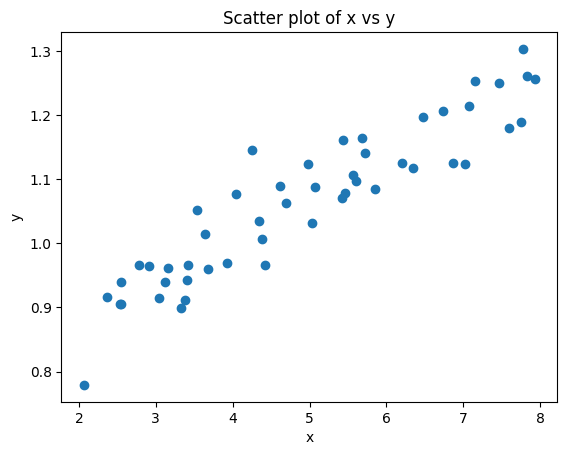

In [8]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x vs y')
plt.show()

In [10]:
def hypothesis(x, w):
    return np.dot(x,w)    

In [11]:
def cost_function(x, y, w):
    m=x.shape[0]
    return 1/(2*m)*np.sum((hypothesis(x,w)-y)**2)

In [12]:
def gradient(x,y,w):
    m=x.shape[0]
    return 1/m*np.dot(x.T,(hypothesis(x,w)-y))

In [14]:
def gradient_descent(x, y, w, learning_rate, iterations, epochs):
    cost_history = np.zeros((epochs, iterations))
    for epoch in range(epochs):
        for i in range(iterations):
            w = w - learning_rate * gradient(x, y, w)
            cost_history[epoch, i] = cost_function(x, y, w)
    return w, cost_history

Final weights: [0.80781983 0.05337908]


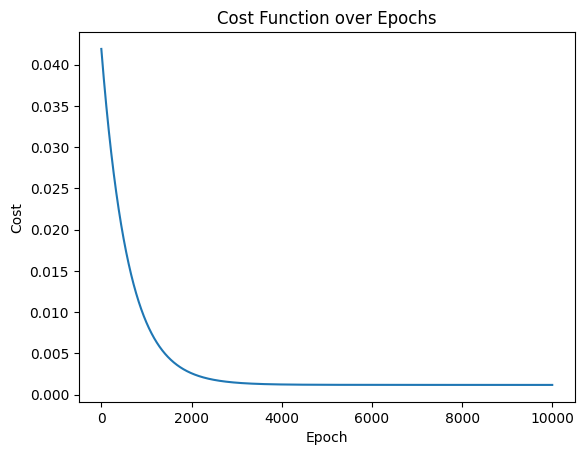

In [40]:
# Run gradient descent
initial_weights = np.array([0.8, 0])
learning_rate = 0.00003
iterations = 10
epochs = 1000

final_weights, cost_history = gradient_descent(X, y, initial_weights, learning_rate, iterations, epochs)
print('Final weights:', final_weights)
# Visualize the cost function for each epoch

plt.plot(range(epochs*iterations),cost_history.flatten())
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Function over Epochs')
plt.show()

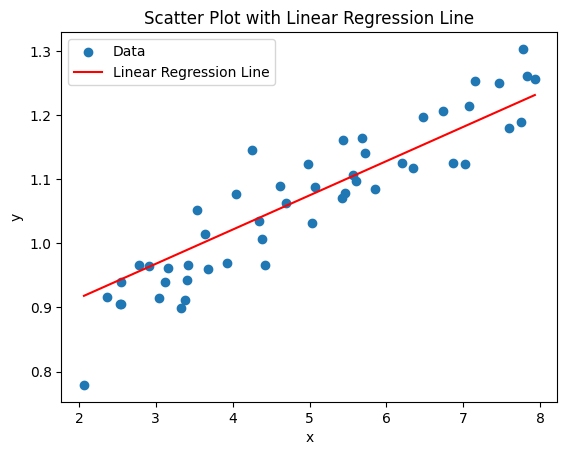

In [41]:
# Scatter plot of the data
plt.scatter(x, y, label='Data')

# Plot the linear regression line
regression_line = hypothesis(X, final_weights)
plt.plot(x, regression_line, color='red', label='Linear Regression Line')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with Linear Regression Line')
plt.legend()
plt.show()